In [ ]:
# Yan Yan
# 1005387582
# INF2178
# Assignment 2

## One-way ANOVA:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=212590df4407a694e0b2f11147046b1fb3803418ee73078363e740175f80543f
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


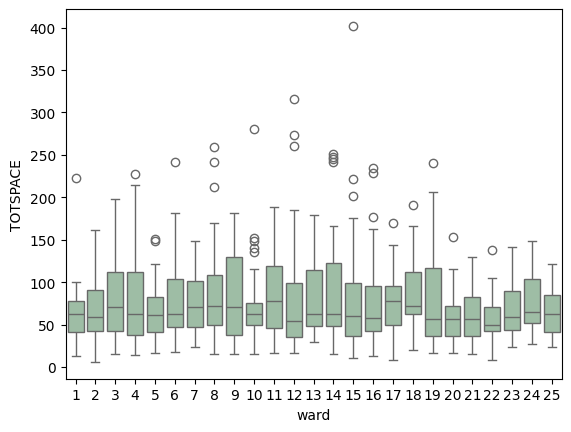

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# Load dataset
df = pd.read_excel("INF2178_A2_data.xlsx")
# Visualize the data distribution by AUSPICE using boxplot
ax = sns.boxplot(x='ward', y='TOTSPACE', data=df, color='#99c2a2')
plt.show()

In [2]:
# Ordinary Least Squares (OLS) model for one-way ANOVA
model = ols('TOTSPACE ~ C(ward)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(ward)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(ward),24.0,7.859806e+04,3274.919334,1.446798,0.07592
Residual,1038.0,2.349579e+06,2263.563887,NaN,NaN


In [3]:
# Post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='ward', anova_model='TOTSPACE ~ C(ward)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,3,8,15.234286,-29.223724,59.692296,1.780060,0.900000
1,3,25,14.646667,-34.331357,63.624691,1.553460,0.900000
2,3,24,2.730000,-47.102853,52.562853,0.284583,0.900000
3,3,6,8.500000,-37.636257,54.636257,0.957060,0.900000
4,3,19,10.343529,-31.524442,52.211501,1.283362,0.900000
...,...,...,...,...,...,...,...
295,7,16,16.924765,-36.327917,70.177447,1.650987,0.900000
296,7,20,8.894545,-46.165215,63.954306,0.839174,0.900000
297,22,16,35.517241,-13.946018,84.980501,3.730087,0.572961
298,22,20,9.697931,-41.705796,61.101659,0.980047,0.900000


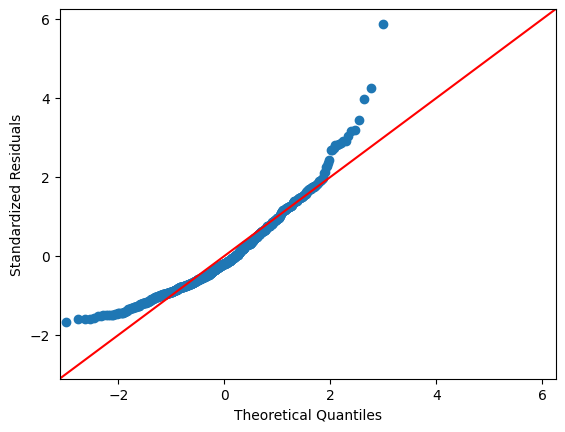

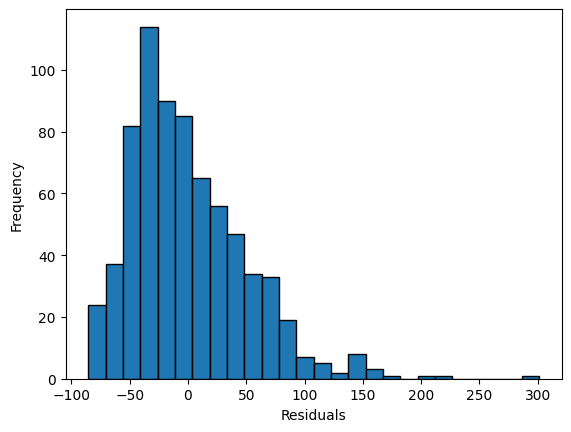

In [4]:
# Checking model diagnostics for assumptions
# Assumption 1: Normality of residuals
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram of residuals
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()


In [5]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print("Shapiro-Wilk test:", w, pvalue)

Shapiro-Wilk test: 0.9063342809677124 5.115220628485922e-25


In [6]:
# Bartlett's test for homogeneity of variances (normally distributed samples)
w, pvalue = stats.bartlett(df['TOTSPACE'], df['SGSPACE'], df['KGSPACE'] )
print("Bartlett's test:", w, pvalue)

res = stat()
res.bartlett(df=df, res_var='TOTSPACE', xfac_var='ward')
print(res.bartlett_summary)

Bartlett's test: 733.9573475582748 4.1993976566031157e-160
                 Parameter    Value
0      Test statistics (T)  142.891
1  Degrees of freedom (Df)   24.000
2                  p value    0.000


In [7]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='ward')
res.levene_summary

,Parameter,Value
0,Test statistics (W),3.2425
1,Degrees of freedom (Df),24.0000
2,p value,0.0000


## Two-way ANOVA: to investigate the interaction effect on total space (TOTSPACE) between whether a center receives a subsidy (subsidy)

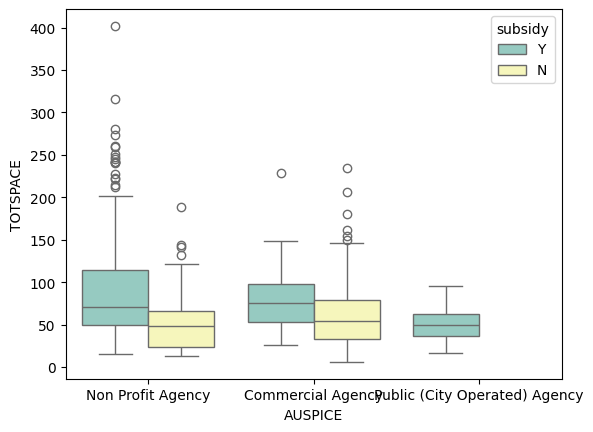

In [8]:
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy", data=df, palette="Set3")
plt.show()

In [9]:
model = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [10]:
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


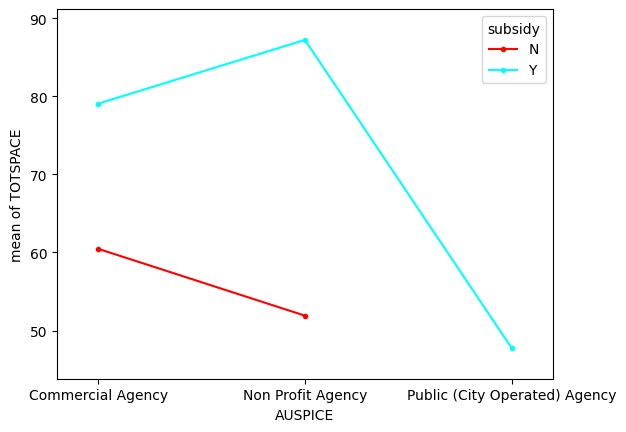

In [11]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=df['AUSPICE'], trace=df['subsidy'], response=df['TOTSPACE'])
plt.show()


In [18]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary
res.tukey_summary = round(res.tukey_summary, 3)
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.807,4.406,29.207,4.502,0.004
1,Non Profit Agency,Public (City Operated) Agency,36.178,9.559,62.796,4.514,0.004
2,Commercial Agency,Public (City Operated) Agency,19.371,-9.192,47.934,2.253,0.250


In [16]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary = round(res.tukey_summary, 3)
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121,24.873,43.369,10.244,0.001


In [17]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var=['AUSPICE', 'subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()
res.tukey_summary = round(res.tukey_summary, 3)
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.986,25.585,64.387,9.370,0.001
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.145,-28.466,28.756,0.020,0.900
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.371,11.192,45.549,6.674,0.001
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.753,8.308,73.198,5.076,0.005
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000,-inf,inf,0.000,0.900
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",44.841,11.398,78.284,5.418,0.002
6,"(Non Profit Agency, N)","(Commercial Agency, N)",16.616,-7.776,41.007,2.753,0.376
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.233,-32.543,41.010,0.465,0.900
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000,-inf,inf,0.000,0.900
9,"(Commercial Agency, Y)","(Commercial Agency, N)",28.225,-3.979,60.430,3.542,0.124


Shapiro-Wilk Test statistic: 0.9018619656562805
Shapiro-Wilk Test p-value: 1.5311055543621852e-25


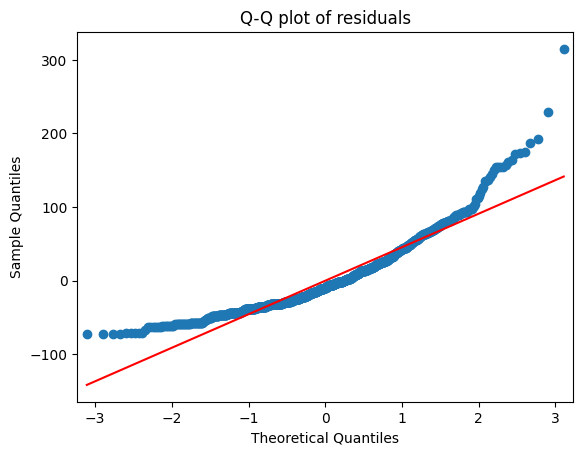

In [20]:
# assumption 1: residuals are normally distributed: Shapiro Wilk test

# Fit the model
model = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()

# Extract residuals
residuals = model.resid

# Normality test using Shapiro-Wilk test
statistic, p_value = stats.shapiro(residuals)

print('Shapiro-Wilk Test statistic:', statistic)
print('Shapiro-Wilk Test p-value:', p_value)

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

In [22]:
# Levene's test for homogeneity of variances
w_statistic, p_value = stats.levene(df['TOTSPACE'][df['AUSPICE'] == 'Non Profit Agency'],
                                    df['TOTSPACE'][df['AUSPICE'] == 'Commercial Agency'],
                                    df['TOTSPACE'][df['AUSPICE'] == 'Public (City Operated) Agency'])
print('Levene’s Test statistic:', w_statistic)
print('Levene’s Test p-value:', p_value)

Levene’s Test statistic: 17.927068524236084
Levene’s Test p-value: 2.2036889276494363e-08
